In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerEnsemble

In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

dates = [2018, 2019]

dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dates = [2019, 2020]

# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
#  	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:
		# exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date

	if type(dataset) == MTMultipleDates:
		# exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140
trainer = TrainerEnsemble(config, dataset, patchesHandler)

trainer.defineExperiment(exp_ids)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy'}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp_ids

[123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121]

In [7]:
# trainer.setExperimentPath()
# trainer.createLogFolders()

In [8]:
# ic(type(dataset), exp, dataset.dates)


In [9]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [10]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [11]:

trainer.label_mask.dtype

dtype('uint8')

In [12]:
unique, count = np.unique(trainer.label_mask, return_counts=True)
print(unique, count)

total = np.sum(count)
percentage_count = [round(x*100, 1) for x in count / total]
print(percentage_count)

[0 1 2] [100903598   1838508  60373894]
[61.9, 1.1, 37.0]


In [13]:
# pdb.set_trace()

In [14]:

trainer.getLabelCurrentDeforestation()

In [15]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [16]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

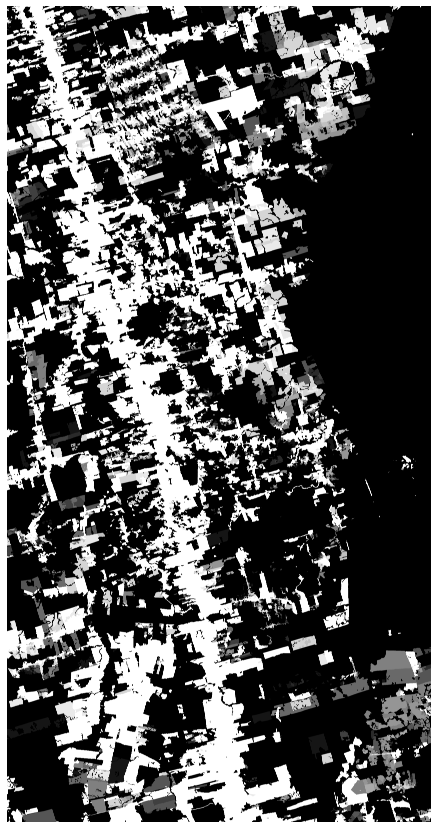

In [17]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [18]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [19]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [20]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [21]:
if config["training"] == True:
    trainer.extractCoords()

In [22]:
if config["training"] == True:
    trainer.trainTestSplit()

In [23]:
if config["training"] == True:
    trainer.label_mask.shape

In [24]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [25]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [26]:
if config["training"] == True:
    print(trainer.coords_train)

In [27]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [28]:
if config["training"] == True:
    inputSnipShow = True

In [29]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [30]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [31]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [32]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [33]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [34]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [35]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [36]:
if config["training"] == True:
    trainer.getGenerators()


In [37]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [38]:
if config["training"] == True:
    print(trainer.path_exp)

In [39]:
if config["training"] == True:
    print(trainer.channels)

In [40]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [41]:
if config["training"] == True:
    trainer.train()

In [42]:
if config["training"] == True:
    trainer.plotHistory()


In [43]:
trainer.image_stack.shape

(17730, 9200, 21)

In [44]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [45]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [46]:
trainer.image_stack.shape

(17730, 9200, 21)

In [47]:
trainer.setPadding()

-30.0 -16.0


In [48]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [49]:
trainer.loadPredictedProbabilities()

In [50]:
trainer.prob_rec.shape

(17760, 9216, 3, 10)

In [51]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [52]:
trainer.prob_rec.shape

(17760, 9216, 3, 10)

In [53]:
trainer.getMeanProb()


In [54]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 1.4644367e-15
    np.mean(value): 0.012334157
    np.max(value): 0.9999992


In [55]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [56]:
trainer.unpadMeanProb()

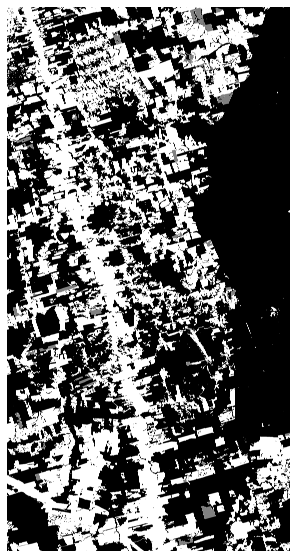

In [57]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [58]:
trainer.squeezeLabel()

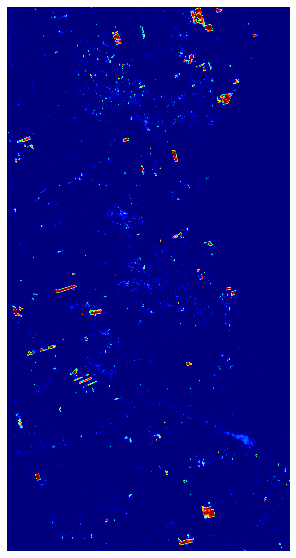

In [59]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [60]:
print(trainer.label_mask.shape)

(17730, 9200)


In [61]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [62]:
# trainer.getMAP()

In [63]:
trainer.prob_rec.shape

(17760, 9216, 3, 10)

In [64]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 3)


In [65]:
trainer.prob_rec.shape

(10, 17760, 9216, 3)

In [66]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 0.0, np.mean(value): 0.33224818, np.max(value): 1.0


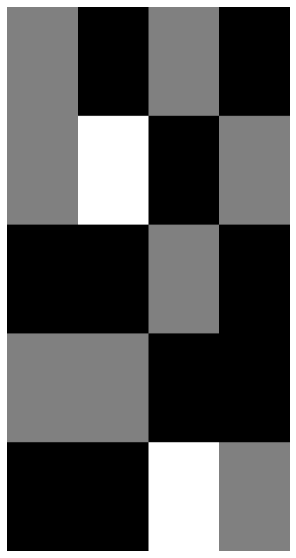

In [67]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [68]:
trainer.getLabelCurrentDeforestation()

In [69]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161675361,   1440639], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [70]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [71]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161675361,   1440639], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161789622,   1326378], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([163001739,    114261], dtype=int64))


In [72]:
trainer.calculateMetrics()

ic| self.f1: 81.41, self.precision: 97.07, self.recall: 70.1


In [73]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9439113,)
ic| f1_val: 82.77
    precision_val: 89.56
    recall_val: 76.94
    mAP_val: 85.73


In [74]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [75]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162427946,    688054], dtype=int64))


In [76]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


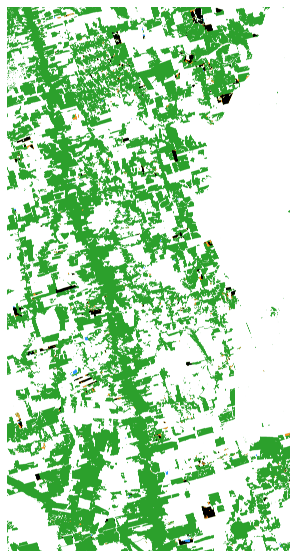

In [77]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [78]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [79]:
trainer.setUncertainty()

In [80]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.036596462
    np.max(value): 0.99999124


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

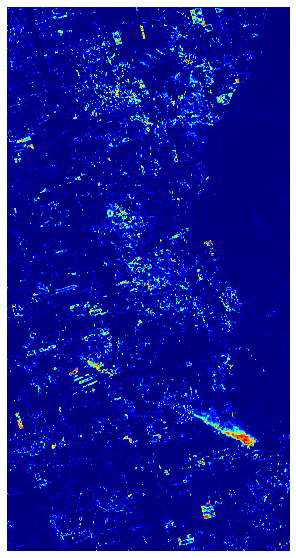

In [81]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



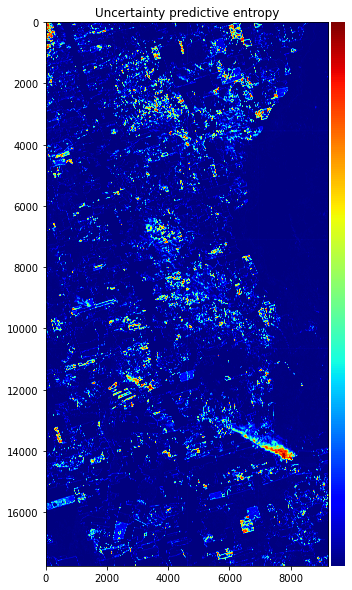

In [82]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [83]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54181542,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


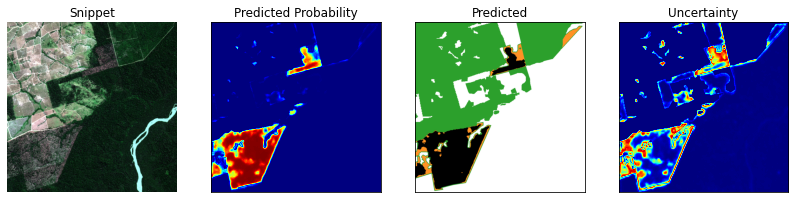

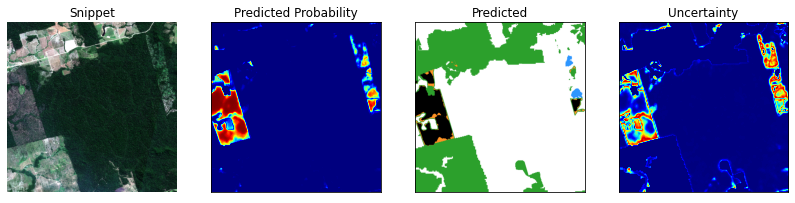

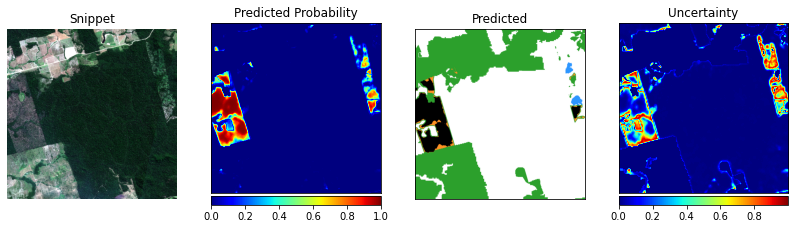

In [84]:
trainer.logger.plotCropSample(trainer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


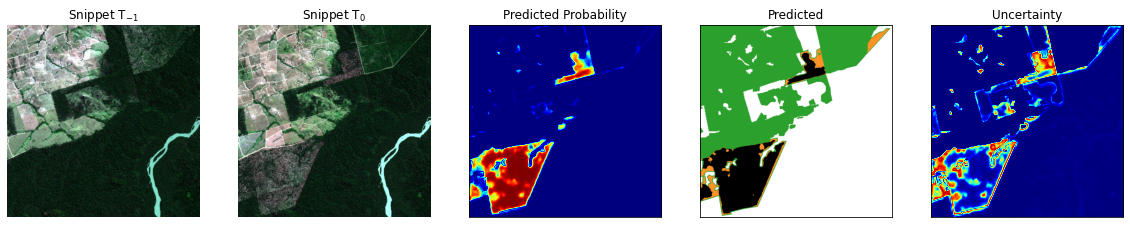

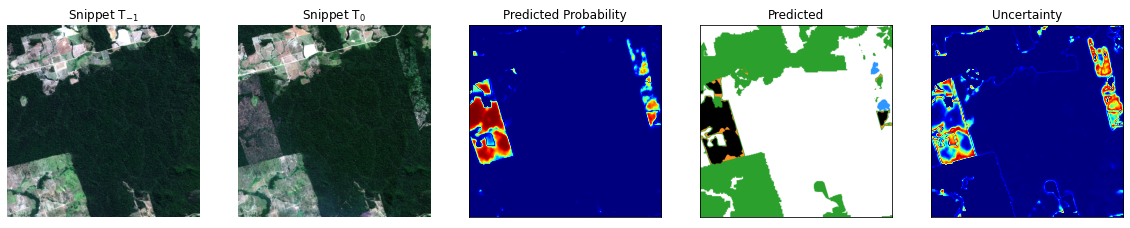

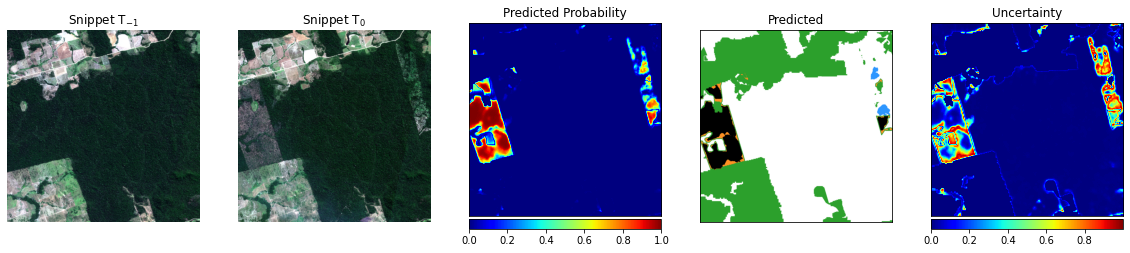

In [85]:
trainer.logger.plotCropSampleT0T1(trainer)

In [86]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [87]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [88]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 1.1122923e-05
    np.mean(value): 0.051469482
    np.max(value): 0.99998873


In [113]:
def getOtherUncertaintyMetrics(self):
    self.sUEO = _metrics.getSUEO(self.uncertainty,
                        self.label_mask_current_deforestation_test,
                        self.predicted_test)
    print(self.sUEO)
    self.ece_score = _metrics.ece_score( 1 - self.uncertainty, 
                                        self.predicted_test,
                                    self.label_mask_current_deforestation_test)
    print(self.ece_score)
    return self.sUEO, self.ece_score

In [114]:

import types

trainer.getOtherUncertaintyMetrics = types.MethodType(getOtherUncertaintyMetrics, trainer)



In [115]:
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  

(54181542,) (54181542,)
0.36656774931705816


In [111]:
trainer.uncertainty.shape

(54181542,)

In [98]:
def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [99]:

import types

trainer.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, trainer)



Get precision-recall threshold

In [100]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54181542,)
    self.label_mask_current_deforestation_test.shape: (54181542,)


[0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9969887347221374, 0.9984887347221375]
threshold 0.0025
(12819978,) (12819978,)


ic| label_current_deforestation_test_classified_incorrect.shape: (41361564,)
    predicted_test_classified_incorrect.shape: (41361564,)


cm_correct [[12801545        0]
 [      33    18400]]


ic| TP_H + FN_H + FP_H + TN_H: 41361564
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 41361564
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[40623479    15672]
 [  221506   500907]]
[1.         0.99820973 0.02483647 0.76338846 0.96966195 0.69338038
 0.00573426]
threshold 0.025
(44120192,) (44120192,)


ic| label_current_deforestation_test_classified_incorrect.shape: (10061350,)
    predicted_test_classified_incorrect.shape: (10061350,)


cm_correct [[44051399        0]
 [    3304    65489]]


ic| TP_H + FN_H + FP_H + TN_H: 10061350
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 10061350
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[9373625   15672]
 [ 218235  453818]]
[1.         0.95197186 0.08839759 0.185697   0.9666191  0.67527115
 0.02324044]
threshold 0.05
(46240543,) (46240543,)


ic| label_current_deforestation_test_classified_incorrect.shape: (7940999,)
    predicted_test_classified_incorrect.shape: (7940999,)


cm_correct [[46122366        0]
 [    6595   111582]]


ic| TP_H + FN_H + FP_H + TN_H: 7940999
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 7940999
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[7302658   15672]
 [ 214944  407725]]
[1.         0.94419388 0.1506143  0.14656281 0.96298509 0.65480215
 0.02901708]
threshold 0.1
(48145975,) (48145975,)


ic| label_current_deforestation_test_classified_incorrect.shape: (6035567,)
    predicted_test_classified_incorrect.shape: (6035567,)


cm_correct [[47972762       13]
 [   11718   161482]]


ic| TP_H + FN_H + FP_H + TN_H: 6035567
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 6035567
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[5452262   15659]
 [ 209821  357825]]
[0.9999195  0.93234411 0.21796973 0.11139526 0.95807317 0.63036646
 0.03728607]
threshold 0.2
(49942051,) (49942051,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4239491,)
    predicted_test_classified_incorrect.shape: (4239491,)


cm_correct [[49697108      382]
 [   19413   225148]]


ic| TP_H + FN_H + FP_H + TN_H: 4239491
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 4239491
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[3727916   15290]
 [ 202126  294159]]
[0.99830621 0.92062103 0.30390661 0.07824604 0.9505896  0.59272192
 0.05104518]
threshold 0.4
(51785736,) (51785736,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2395806,)
    predicted_test_classified_incorrect.shape: (2395806,)


cm_correct [[51440988      963]
 [   34860   308925]]


ic| TP_H + FN_H + FP_H + TN_H: 2395806
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 2395806
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[1984036   14709]
 [ 186679  210382]]
[0.99689243 0.89859942 0.4169895  0.04421812 0.9346531  0.52984806
 0.0828202 ]
threshold 0.5
(52380532,) (52380532,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1801010,)
    predicted_test_classified_incorrect.shape: (1801010,)


cm_correct [[51991170     1457]
 [   44510   343395]]


ic| TP_H + FN_H + FP_H + TN_H: 1801010
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1801010
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[1433854   14215]
 [ 177029  175912]]
[0.995775   0.88525541 0.46351738 0.03324029 0.92523419 0.49841758
 0.10354433]
threshold 0.6
(52853092,) (52853092,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1328450,)
    predicted_test_classified_incorrect.shape: (1328450,)
ic| TP_H + FN_H + FP_H + TN_H: 1328450
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1328450
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[52416242     2719]
 [   55913   378218]]
cm_incorrect [[1008782   12953]
 [ 165626  141089]]
[0.99286234 0.87120708 0.51052175 0.0245185  0.91591254 0.46000033
 0.12874437]
threshold 0.7
(53238100,) (53238100,)


ic| label_current_deforestation_test_classified_incorrect.shape: (943442,)
    predicted_test_classified_incorrect.shape: (943442,)
ic| TP_H + FN_H + FP_H + TN_H: 943442
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 943442
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[52746913     4971]
 [   70459   415757]]
cm_incorrect [[678111  10701]
 [151080 103550]]
[0.98818477 0.85508704 0.5611922  0.01741261 0.9063378  0.4066685
 0.15878442]
threshold 0.8
(53550875,) (53550875,)


ic| label_current_deforestation_test_classified_incorrect.shape: (630667,)
    predicted_test_classified_incorrect.shape: (630667,)
ic| TP_H + FN_H + FP_H + TN_H: 630667
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 630667
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[52992829     8185]
 [   90000   459861]]
cm_incorrect [[432195   7487]
 [131539  59446]]
[0.9825124  0.83632227 0.62072415 0.01163989 0.88814187 0.31126005
 0.19074654]
threshold 0.9
(53901448,) (53901448,)


ic| label_current_deforestation_test_classified_incorrect.shape: (280094,)
    predicted_test_classified_incorrect.shape: (280094,)
ic| TP_H + FN_H + FP_H + TN_H: 280094
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 280094
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[53247550    15093]
 [  128677   510128]]
cm_incorrect [[177474    579]
 [ 92862   9179]]
[0.97126353 0.79856607 0.68857495 0.00516955 0.94066407 0.08995404
 0.22045043]
threshold 0.9969887347221374
(54181279,) (54181279,)


ic| label_current_deforestation_test_classified_incorrect.shape: (263,)
    predicted_test_classified_incorrect.shape: (263,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 263
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 263
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[53424805    15672]
 [  221495   519307]]
cm_incorrect [[219   0]
 [ 44   0]]
[9.70705392e-01 7.01006477e-01 7.00964843e-01 4.85405159e-06
            nan 0.00000000e+00 1.85317778e-04]
threshold 0.9984887347221375
(54181404,) (54181404,)


ic| label_current_deforestation_test_classified_incorrect.shape: (138,)
    predicted_test_classified_incorrect.shape: (138,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:295: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 138
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 138
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[53424915    15672]
 [  221510   519307]]
cm_incorrect [[109   0]
 [ 29   0]]
[9.70705392e-01 7.00992283e-01 7.00964843e-01 2.54699285e-06
            nan 0.00000000e+00 1.22197876e-04]


In [101]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54181542,)
    self.label_mask_current_deforestation_test.shape: (54181542,)


threshold 0.0025
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [      33   740813]]
[1.         0.99995546]
threshold 0.025
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    3304   737542]]
[1.         0.99554023]
threshold 0.05
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    6595   734251]]
[1.         0.99109801]
threshold 0.1
(54181542,) (54181542,)
cm_audited [[53440683       13]
 [   11718   729128]]
[0.99998217 0.98418295]
threshold 0.2
(54181542,) (54181542,)
cm_audited [[53440314      382]
 [   19413   721433]]
[0.99947078 0.97379617]
threshold 0.4
(54181542,) (54181542,)
cm_audited [[53439733      963]
 [   34860   705986]]
[0.99863781 0.95294569]
threshold 0.5
(54181542,) (54181542,)
cm_audited [[53439239     1457]
 [   44510   696336]]
[0.99791199 0.93992004]
threshold 0.6
(54181542,) (54181542,)
cm_audited [[53437977     2719]
 [   55913   684933]]
[0.99604597 0.92452817]
threshold 0.7
(54181542,) (54181542,)
cm_audited [[53435725     49

ic| metric_values_audited: array([[1.        , 0.99995546],
                                  [1.        , 0.99554023],
                                  [1.        , 0.99109801],
                                  [0.99998217, 0.98418295],
                                  [0.99947078, 0.97379617],
                                  [0.99863781, 0.95294569],
                                  [0.99791199, 0.93992004],
                                  [0.99604597, 0.92452817],
                                  [0.99263946, 0.90489386],
                                  [0.98758025, 0.87851726],
                                  [0.97593828, 0.82631073],
                                  [0.9707078 , 0.70102423],
                                  [0.97070698, 0.70100399]])


cm_audited [[53425024    15672]
 [  221510   519336]]
[0.97070698 0.70100399]


In [102]:
trainer.setPlotLimsForUncertaintyAA()

In [103]:
'''
import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
'''


'\nimport types\n\ntrainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)\n'

In [104]:
trainer.xlim


[-0.1, 10.4]

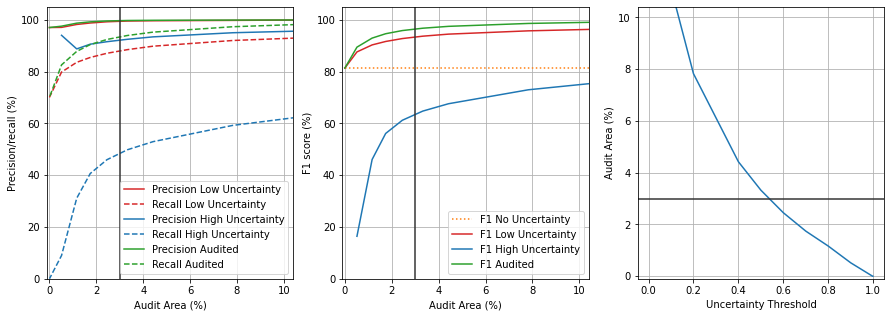

In [105]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

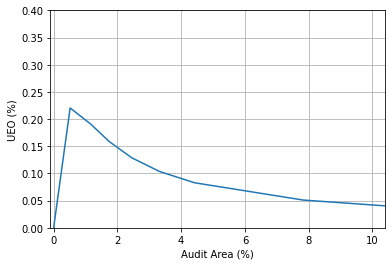

In [106]:
trainer.plotUEO()

In [107]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.9984887347221375)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.382315810263104
threshold 0.382315810263104
(51666733,) (51666733,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2514809,)
    predicted_test_classified_incorrect.shape: (2514809,)


cm_correct [[51330054      904]
 [   33233   302542]]


ic| TP_H + FN_H + FP_H + TN_H: 2514809
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 2514809
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[2094970   14768]
 [ 188306  216765]]
[0.99702089 0.90102598 0.40837367 0.0464145  0.93621644 0.53512841
 0.07966979]
0.6176729244590333
threshold 0.6176729244590333
(52933878,) (52933878,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1247664,)
    predicted_test_classified_incorrect.shape: (1247664,)
ic| TP_H + FN_H + FP_H + TN_H: 1247664
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1247664
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[52488204     3138]
 [   58208   384328]]
cm_incorrect [[936820  12534]
 [163331 134979]]
[0.99190122 0.8684672  0.51876908 0.02302747 0.91503122 0.45247896
 0.13434962]
0.7631316205262081
threshold 0.7631316205262081
(53433443,) (53433443,)


ic| label_current_deforestation_test_classified_incorrect.shape: (748099,)
    predicted_test_classified_incorrect.shape: (748099,)
ic| TP_H + FN_H + FP_H + TN_H: 748099
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 748099
    len(label_mask_current_deforestation_test): 54181542


cm_correct [[52901915     6752]
 [   81955   442821]]
cm_incorrect [[523109   8920]
 [139584  76486]]
[0.9849813  0.8438286  0.59772341 0.01380727 0.89555769 0.35398713
 0.17746527]
0.5737949868346727
threshold 0.5737949868346727
(52736797,) (52736797,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1444745,)
    predicted_test_classified_incorrect.shape: (1444745,)
ic| TP_H + FN_H + FP_H + TN_H: 1444745
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H

cm_correct [[52312736     2276]
 [   52692   369093]]
cm_incorrect [[1112288   13396]
 [ 168847  150214]]


 + FN_H + FP_H + TN_H: 1444745
    len(label_mask_current_deforestation_test): 54181542


[0.99387132 0.87507379 0.49820476 0.02666489 0.91812236 0.47080025
 0.12151858]
0.500656449522176
threshold 0.500656449522176
(52384001,) (52384001,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1797541,)
    predicted_test_classified_incorrect.shape: (1797541,)


cm_correct [[51994329     1464]
 [   44583   343625]]


ic| TP_H + FN_H + FP_H + TN_H: 1797541
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1797541
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[1430695   14208]
 [ 176956  175682]]
[0.99575762 0.88515693 0.46382784 0.03317626 0.92517773 0.49819361
 0.10369128]
0.5356516283685735
threshold 0.5356516283685735
(52559992,) (52559992,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1621550,)
    predicted_test_classified_incorrect.shape: (1621550,)
ic

cm_correct [[52154076     1856]
 [   48266   355794]]
cm_incorrect [[1270948   13816]
 [ 173273  163513]]


| TP_H + FN_H + FP_H + TN_H: 1621550
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1621550
    len(label_mask_current_deforestation_test): 54181542


[0.99481057 0.88054744 0.48025366 0.02992809 0.92208832 0.48551009
 0.11191729]
0.5367699420530674
threshold 0.5367699420530674
(52565448,) (52565448,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1616094,)
    predicted_test_classified_incorrect.shape: (1616094,)
ic

cm_correct [[52158986     1866]
 [   48381   356215]]
cm_incorrect [[1266038   13806]
 [ 173158  163092]]


| TP_H + FN_H + FP_H + TN_H: 1616094
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1616094
    len(label_mask_current_deforestation_test): 54181542


[0.99478889 0.88042146 0.48082193 0.02982739 0.92195502 0.48503197
 0.11220032]
0.5271148828994088
threshold 0.5271148828994088
(52518449,) (52518449,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1663093,)
    predicted_test_classified_incorrect.shape: (1663093,)
ic

cm_correct [[52116460     1756]
 [   47377   352856]]
cm_incorrect [[1308564   13916]
 [ 174162  166451]]


| TP_H + FN_H + FP_H + TN_H: 1663093
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1663093
    len(label_mask_current_deforestation_test): 54181542


[0.99504811 0.88162645 0.47628792 0.03069483 0.9228462  0.4886807
 0.10984414]
0.5323908817526593
threshold 0.5323908817526593
(52544215,) (52544215,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1637327,)
    predicted_test_classified_incorrect.shape: (1637327,)
ic

cm_correct [[52139743     1816]
 [   47946   354710]]
cm_incorrect [[1285281   13856]
 [ 173593  164597]]


| TP_H + FN_H + FP_H + TN_H: 1637327
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1637327
    len(label_mask_current_deforestation_test): 54181542


[0.9949064  0.88092565 0.47879046 0.03021928 0.92235491 0.48669978
 0.11110795]
0.5347529469116551
threshold 0.5347529469116551
(52555624,) (52555624,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625918,)
    predicted_test_classified_incorrect.shape: (1625918,)
ic

cm_correct [[52150138     1843]
 [   48172   355471]]
cm_incorrect [[1274886   13829]
 [ 173367  163836]]


| TP_H + FN_H + FP_H + TN_H: 1625918
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625918
    len(label_mask_current_deforestation_test): 54181542


[0.99484207 0.88065692 0.47981767 0.03000871 0.9221625  0.48586756
 0.11169659]
0.5338507183045607
threshold 0.5338507183045607
(52551350,) (52551350,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1630192,)
    predicted_test_classified_incorrect.shape: (1630192,)
ic

cm_correct [[52146233     1832]
 [   48085   355200]]
cm_incorrect [[1278791   13840]
 [ 173454  164107]]


| TP_H + FN_H + FP_H + TN_H: 1630192
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1630192
    len(label_mask_current_deforestation_test): 54181542


[0.99486881 0.8807667  0.47945187 0.03008759 0.92222403 0.48615509
 0.11147729]
0.5348008635272538
threshold 0.5348008635272538
(52555876,) (52555876,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625666,)
    predicted_test_classified_incorrect.shape: (1625666,)


cm_correct [[52150368     1843]
 [   48178   355487]]


ic| TP_H + FN_H + FP_H + TN_H: 1625666
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625666
    len(label_mask_current_deforestation_test): 54181542


cm_incorrect [[1274656   13829]
 [ 173361  163820]]
[0.9948423  0.88064856 0.47983926 0.03000406 0.92215549 0.48585181
 0.11170941]
0.5350235654078719
threshold 0.5350235654078719
(52556977,) (52556977,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624565,)
    predicted_test_classified_incorrect.shape: (1624565,)
ic

cm_correct [[52151364     1847]
 [   48199   355567]]
cm_incorrect [[1273660   13825]
 [ 173340  163740]]


| TP_H + FN_H + FP_H + TN_H: 1624565
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1624565
    len(label_mask_current_deforestation_test): 54181542


[0.99483232 0.8806264  0.47994725 0.02998374 0.92214119 0.48576006
 0.11176625]
0.5348859280762913
threshold 0.5348859280762913
(52556293,) (52556293,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625249,)
    predicted_test_classified_incorrect.shape: (1625249,)
ic

cm_correct [[52150750     1843]
 [   48184   355516]]
cm_incorrect [[1274274   13829]
 [ 173355  163791]]


| TP_H + FN_H + FP_H + TN_H: 1625249
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625249
    len(label_mask_current_deforestation_test): 54181542


[0.99484272 0.88064404 0.47987841 0.02999636 0.92214278 0.48581623
 0.11173323]
0.5349192693432651
threshold 0.5349192693432651
(52556459,) (52556459,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625083,)
    predicted_test_classified_incorrect.shape: (1625083,)
ic

cm_correct [[52150887     1844]
 [   48189   355539]]
cm_incorrect [[1274137   13828]
 [ 173350  163768]]


| TP_H + FN_H + FP_H + TN_H: 1625083
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625083
    len(label_mask_current_deforestation_test): 54181542


[0.99484027 0.88063994 0.47990945 0.0299933  0.92213789 0.48578836
 0.11174032]
0.5348525868093176
threshold 0.5348525868093176
(52556129,) (52556129,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625413,)
    predicted_test_classified_incorrect.shape: (1625413,)
ic

cm_correct [[52150600     1843]
 [   48181   355505]]
cm_incorrect [[1274424   13829]
 [ 173358  163802]]


| TP_H + FN_H + FP_H + TN_H: 1625413
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625413
    len(label_mask_current_deforestation_test): 54181542
ic| self.threshold_optimal: 0.5348525868093176


[0.99484256 0.88064733 0.47986356 0.02999939 0.9221476  0.48582869
 0.11172428]


In [108]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.5348525868093176
(52556129,) (52556129,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1625413,)
    predicted_test_classified_incorrect.shape: (1625413,)
ic

cm_correct [[52150600     1843]
 [   48181   355505]]
cm_incorrect [[1274424   13829]
 [ 173358  163802]]


| TP_H + FN_H + FP_H + TN_H: 1625413
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625413
    len(label_mask_current_deforestation_test): 54181542


[0.99484256 0.88064733 0.47986356 0.02999939 0.9221476  0.48582869
 0.11172428]
threshold 0.5348525868093176
(54181542,) (54181542,)


ic| self.m_optimal: {'AA': array([0.02999939]),
                     'UEO': array([0.11172428]),
                     'f1': 81.41,
                     'f1_H': array([0.63638253]),
                     'f1_L': array([0.93426838]),
                     'precision_H': array([0.9221476]),
                     'precision_L': array([0.99484256]),
                     'recall_H': array([0.48582869]),
                     'recall_L': array([0.88064733]),
                     'recall_Ltotal': array([0.47986356])}
ic| self.m_audited_optimal: {'f1': array([0.96514867]),
                             'precision': array([0.99734632]),
                             'recall': array([0.93496489])}


cm_audited [[53438853     1843]
 [   48181   692665]]
[0.99734632 0.93496489]


{'metrics': {'precision_L': array([0.99484256]),
  'recall_L': array([0.88064733]),
  'recall_Ltotal': array([0.47986356]),
  'AA': array([0.02999939]),
  'precision_H': array([0.9221476]),
  'recall_H': array([0.48582869]),
  'UEO': array([0.11172428]),
  'f1_L': array([0.93426838]),
  'f1_H': array([0.63638253]),
  'f1': 81.41},
 'metrics_audited': {'precision': array([0.99734632]),
  'recall': array([0.93496489]),
  'f1': array([0.96514867])},
 'exp': 123}